<a href="https://colab.research.google.com/github/ricky4918/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/Recurrent%20Neural%20Network_Time%20Series_and_Sequence%20Data/LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import tensorflow as tf 
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D, SimpleRNN, LSTM
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
series = np.sin((0.1*np.arange(400))**2)

#This is time series of the form:
x(t) = sin(wt2)

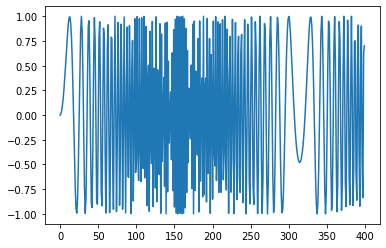

In [29]:
plt.plot(series)
plt.show()

In [30]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)


X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10, 1) Y.shape (390,)


In [ ]:
i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(lr = 0.1),
)
r = model.fit(X[:-N//2], Y[:-N//2],
              epochs=80,
              validation_data = (X[-N//2:], Y[-N//2:]))

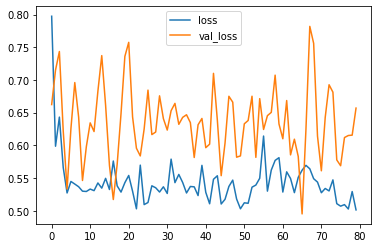

In [32]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

(390, 1)


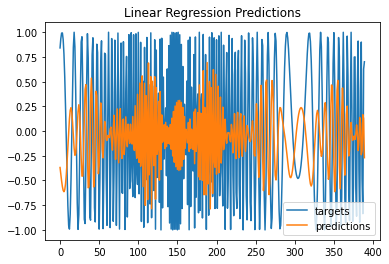

In [33]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label = 'targets')
plt.plot(predictions, label = 'predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()


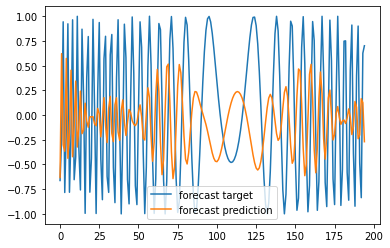

In [36]:
validation_target = Y[-N//2:]
validation_predictions = []


i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0]
  i+=1

  validation_predictions.append(p)

  
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()

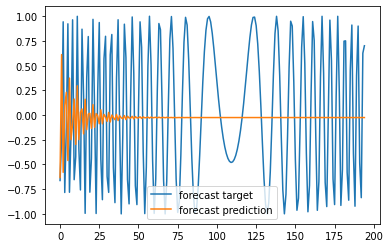

In [37]:
validation_target = Y[-N//2:]
validation_predictions = []


last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]

  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()

In [45]:
X = X.reshape(-1,T,1)


i = Input(shape = (T,D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(lr = 0.05),
)

r = model.fit(X[:-N//2], Y[:-N//2],
              batch_size = 32,
              epochs=200,
              validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 3s 93ms/step - loss: 0.5277 - val_loss: 0.5659
Epoch 2/200
7/7 [==============================] - 0s 13ms/step - loss: 0.5393 - val_loss: 0.5456
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4880 - val_loss: 0.5767
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4668 - val_loss: 0.6134
Epoch 5/200
7/7 [==============================] - 0s 14ms/step - loss: 0.4211 - val_loss: 0.4522
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3570 - val_loss: 0.4041
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.2423 - val_loss: 0.4064
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1736 - val_loss: 0.2083
Epoch 9/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1140 - val_loss: 0.1729
Epoch 10/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1094 - val_loss: 0.1525
Epoch 11/200
7/7 [=============

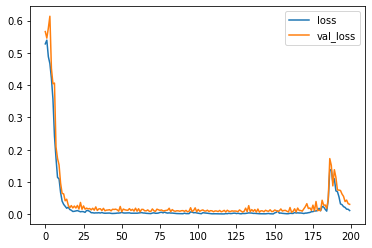

In [46]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

(390, 1)


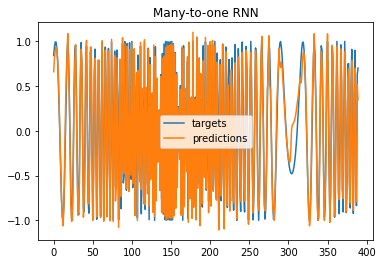

In [47]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label = 'targets')
plt.plot(predictions, label = 'predictions')
plt.title("Many-to-one RNN")
plt.legend()
plt.show()


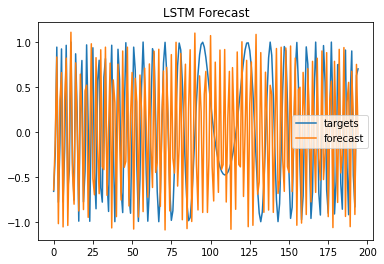

In [49]:
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  f = model.predict(input_.reshape(1,T,1))[0,0]
  forecast.append(f)

  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label = 'targets')
plt.plot(forecast, label = 'forecast')
plt.title('LSTM Forecast')
plt.legend()
plt.show()